In [4]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

##FIRST MACHINE LEARNING PROJECT USING CALIFORNIA HOUSE PRICE PREDICTION DATA

link to dataset is https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features?select=California_Houses.csv

This dataset includes features that shows "Distance to coast", "Distance to Los Angeles", "Distance to San Diego", "Distance to San Jose", and "Distance to San Francisco". These extra features try to account for the distance to the nearest coast and the distance to the centre of the largest cities in California

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are pretty self-explanatory:

1) Median House Value: Median house value for households within a block (measured in US Dollars)
2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]
3) Median Age: Median age of a house within a block; a lower number is a newer building [years]
4) Total Rooms: Total number of rooms within a block
5) Total Bedrooms: Total number of bedrooms within a block
6) Population: Total number of people residing within a block
7) Households: Total number of households, a group of people residing within a home unit, for a block
8) Latitude: A measure of how far north a house is; a higher value is farther north [°]
9) Longitude: A measure of how far west a house is; a higher value is farther west [°]
10) Distance to coast: Distance to the nearest coast point [m]
11) Distance to Los Angeles: Distance to the centre of Los Angeles [m]
12) Distance to San Diego: Distance to the centre of San Diego [m]
13) Distance to San Jose: Distance to the centre of San Jose [m]
14) Distance to San Francisco: Distance to the centre of San Francisco [m]

In [3]:
df = pd.read_csv('California_Houses.csv')
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [5]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [6]:
plt.figure(figsize=(12, 6))
plt.bar


<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

<Figure size 864x432 with 0 Axes>

In [7]:
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

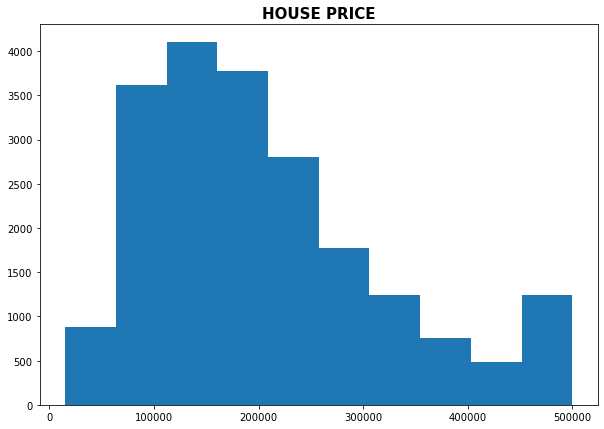

In [8]:
plt.figure(figsize=(10,7))
plt.hist(df.Median_House_Value)
plt.title("HOUSE PRICE", size=15, weight='bold');
plt.show();

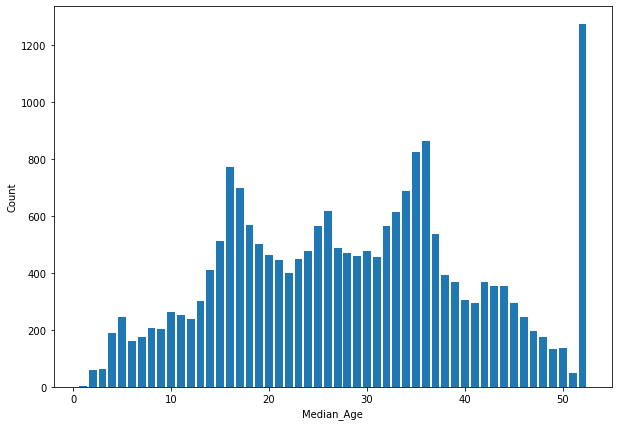

In [9]:
#plot a histogram to show how old are the houses
plt.figure(figsize=(10,7))
x = df['Median_Age'].unique()

#count of the labels
y = df['Median_Age'].value_counts(sort = False)

plt.bar(x,y)

plt.xlabel('Median_Age')
plt.ylabel('Count')

plt.show()


Most houses were built between 15-40 years ago, Very few houses are being constructed in the recent years

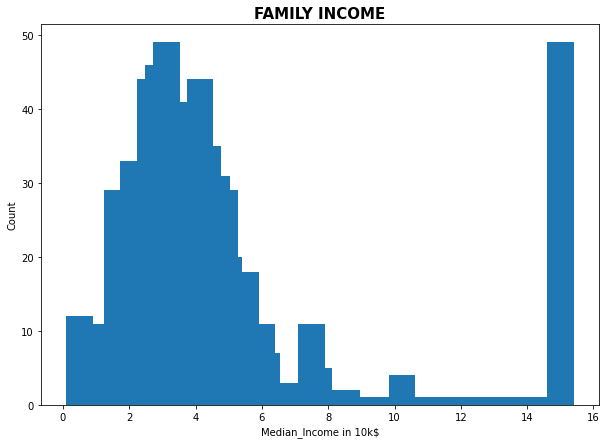

In [10]:
plt.figure(figsize=(10,7))
x = df['Median_Income'].unique()

y = df['Median_Income'].value_counts(sort = False)

plt.bar(x,y)

plt.xlabel('Median_Income in 10k$')

plt.ylabel('Count')

plt.title("FAMILY INCOME", size=15, weight='bold');
plt.show()


In [ ]:
sns.scatterplot(x=df.Latitude, y=df.Longitude)

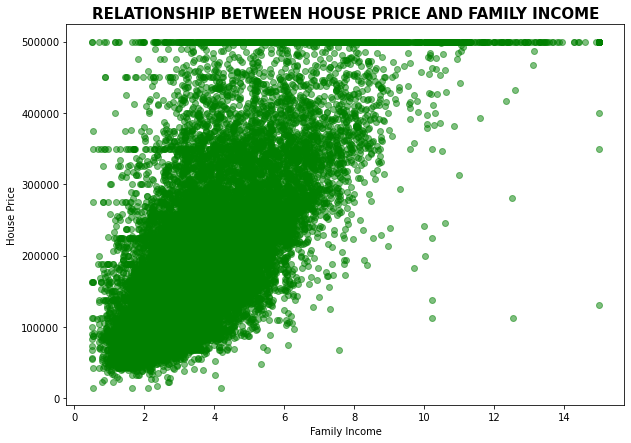

In [11]:
#To show relationship between family income and house peice
plt.figure(figsize=(10,7))
plt.scatter(df['Median_Income'], df['Median_House_Value'], color = 'green', alpha = 0.5)
plt.xlabel('Family Income')
plt.ylabel('House Price')
plt.title("RELATIONSHIP BETWEEN HOUSE PRICE AND FAMILY INCOME", size=15, weight='bold');
plt.show()

Most families have midium income and there is a positive correlation between income and house price ie the higher the house income, the higher the house value

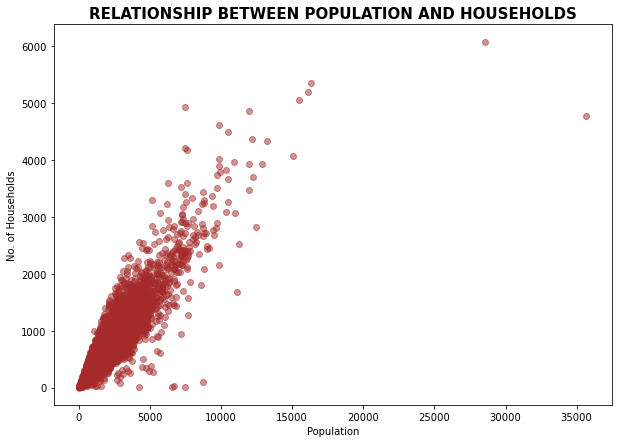

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(df['Population'], df['Households'], color = 'brown', alpha = 0.5)
plt.xlabel('Population')
plt.ylabel('No. of Households')
plt.title("RELATIONSHIP BETWEEN POPULATION AND HOUSEHOLDS", size=15, weight='bold');
plt.show()

An increase in population indicates increase in number of households

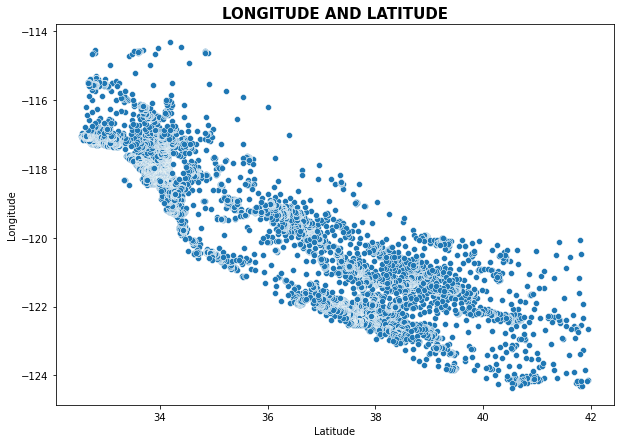

In [31]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df.Latitude, y=df.Longitude)
plt.title("LONGITUDE AND LATITUDE", size=15, weight='bold');

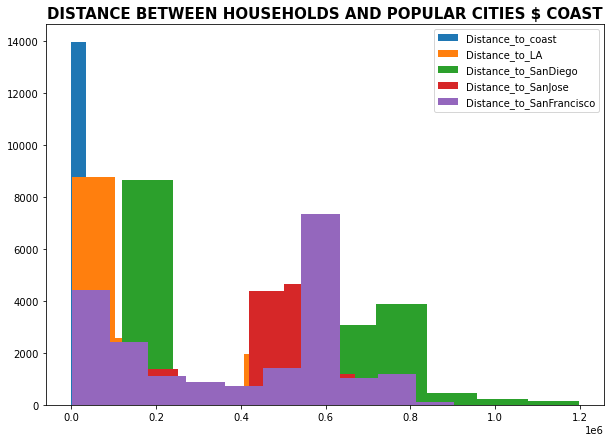

In [41]:
plt.figure(figsize=(10,7))
plt.hist(df.Distance_to_coast)
plt.hist(df.Distance_to_LA)
plt.hist(df.Distance_to_SanDiego)
plt.hist(df.Distance_to_SanJose)
plt.hist(df.Distance_to_SanFrancisco)
plt.legend(['Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco'])
plt.title("DISTANCE BETWEEN HOUSEHOLDS AND POPULAR CITIES $ COAST", size=15, weight='bold');

Most of the households are closer to LA, SANDIAGO and the COAST and are far from SANJOSE

CONCLUSION
DATA ANALYSIS HAS BEEN DONE TO ANSWER THE FOLLOWING QUESTIONS
1. How old are the houses? Most houses are between 15-25 yrs old
2. How far are they from major towns? Most households are closer to the coast, SanDiago and LA
3. What is the income of majority of the people?Majority of the people have a median income of 10k-50k USD
4. What is the realtionship between longitude and latitude? They are inversely correlated
5. what is the price for majority of houses? 50000-250000

MACHINE LEARNING MODEL USING LINEAR REGRESSION

output is Y: prediction
input data is x


In [12]:
y = df.Median_House_Value  
x = df.drop('Median_House_Value', axis=1)


In [13]:
#Train the data using linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
#we split the data into training data and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)


In [15]:
x_train.shape

(16512, 13)

In [16]:
y_train.shape

(16512,)

In [17]:
y_test.shape

(4128,)

In [18]:
#20% of the total data
x_test.shape

(4128, 13)

In [19]:
model

LinearRegression()

In [20]:
#to train the data, we call the fit() method on the model
model.fit(x_train, y_train)

LinearRegression()

In [21]:
#After the model has been trained, we should test the model
model.score(x_test, y_test)

0.6418113940457099

RANDOM FOREST MODEL

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(x_train, y_train)
pred = forest_model.predict(x_test)
mean_absolute_error(y_test, pred)

30451.87410852713

In [26]:
forest_model.score(x_test,y_test)

0.8332853197949387

In [27]:
predict = model.predict(x_test)
mean_absolute_error(y_test,predict)

50346.117379160365